# Задание 1

Задача: Создать чат бота для получения информации об исследованиях космоса

Описание: Создайте комплексное приложение командной строки, которое будет использоваться в качестве панели управления исследованиями космоса. Данное приложение будет обращаться к https://api.nasa.gov/ для предоставления пользователям набора информации о космосе, включая:

- Астрономическая картинка дня (APOD): Отображение APOD с пояснениями к нему.
- Фотографии с марсохода: позволяет пользователям выбирать и фильтровать фотографии с марсохода по дате и типу камеры.
- Объекты, сближающиеся с Землей (ОСЗ): Поиск и отображение информации об объекте, сближающихся с Землей, на определенную дату, включая их размеры и потенциальную опасность.
- Данные о космической погоде: Отображают последние данные о космической погоде, включая солнечные вспышки и геомагнитные бури.
Приложение должно позволять пользователям ориентироваться в этих функциях, корректно обрабатывать ошибки и обеспечивать удобство работы.

Требования:
- Пользовательский ввод: Приложение должно предложить пользователю ввести данные, чтобы выбрать, какую функцию он хочет изучить.
- Проверка данных: Убедитесь, что пользовательские данные (например, даты) проверены.
- Обработка ошибок: Корректно обрабатывайте ошибки API и неверные ответы.
- Представление данных: Представляйте данные в четкой и организованной форме.
- Опция выхода: позволяет пользователям выходить из приложения в любое время.

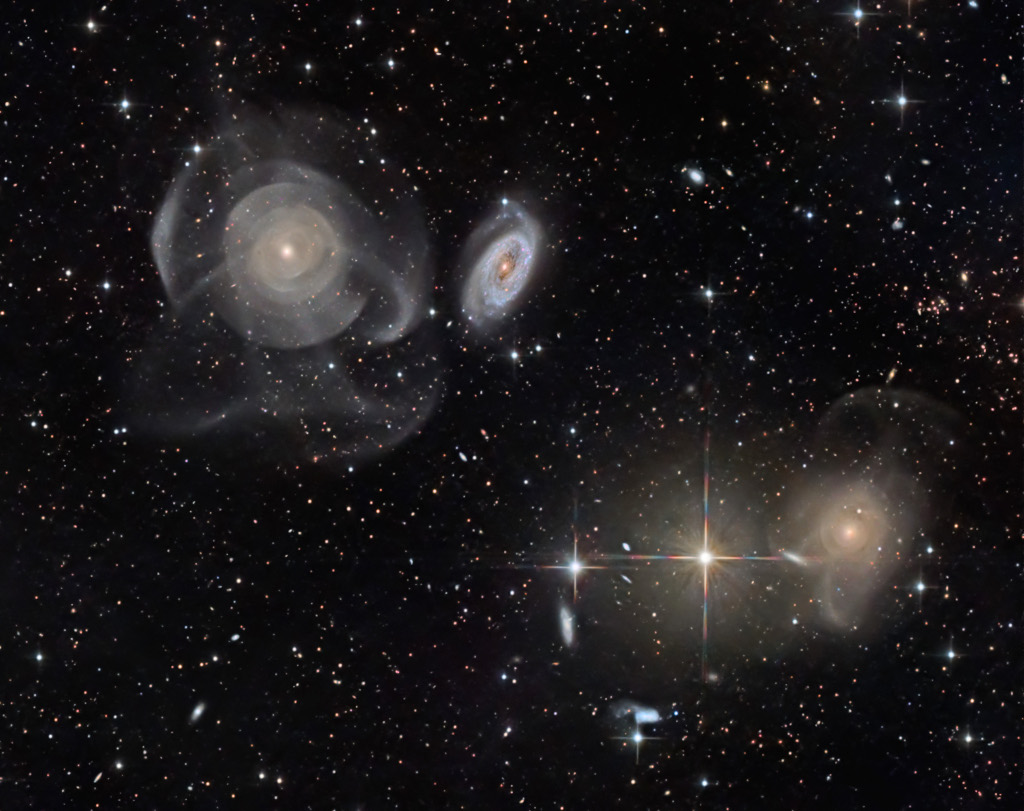

This spectacular intergalactic skyscape features Arp 227, a curious system of galaxies from the 1966 Atlas of Peculiar Galaxies. Some 100 million light-years distant within the boundaries of the constellation Pisces, Arp 227 consists of the two galaxies prominent above and left of center, the shell galaxy NGC 474 and its blue, spiral-armed neighbor NGC 470. The readily apparent shells and star streams of NGC 474 are likely tidal features originating from the accretion of another smaller galaxy during close gravitational encounters that began over a billion years ago. The large galaxy on the bottom righthand side of the deep image, NGC 467, appears to be surrounded by faint shells and streams too, evidence of another merging galaxy system. Intriguing background galaxies are scattered around the field that also includes spiky foreground stars. Of course, those stars lie well within our own Milky Way Galaxy. The telescopic field of view spans 25 arc minutes or just under 1/2 degree on the

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


class Rover:
    Curiocity = 'curiosity'
    Opportunity = 'opportunity'
    Spirit = 'spirit'

    @staticmethod
    def values():
        return [i for i in list(vars(Rover).values()) if isinstance(i, str) and not i.startswith('_')]

    @staticmethod
    def check(text: str):
        return text in Rover.values()


class RoverCamera:
    Front_Hazard_Avoidance_Camera = 'fhaz'
    Rear_Hazard_Avoidance_Camera = 'rhaz'
    Mast_Camera = 'mast'
    Chemistry_and_Camera_Complex = 'chemcam'
    Mars_Hand_Lens_Imager = 'mahli'
    Mars_Descent_Imager = 'vardi'
    Navigation_Camera = 'navcam'
    Panoramic_Camera = 'pancam'
    Miniature_Thermal_Emission_Spectrometer = 'minites'

    @staticmethod
    def values():
        return [i for i in list(vars(RoverCamera).values()) if isinstance(i, str) and not i.startswith('_')]

    @staticmethod
    def check(text: str):
        return text in RoverCamera.values()


class SpaceSearcher:
    def __init__(self):
        self.BASE_URL = 'https://api.nasa.gov'
        self.API_KEY = 'B3Qzh7KMT8qXnSxkVrrHFWNh0oWZoZRQllAQzrQc'

    def get(self, url):
        req_endpoint = f'{url}{"?" if not "?" in url else "&"}api_key={self.__API_KEY}'
        return requests.get(req_endpoint)

    def show_apod(self):
        res = self.get(f'{self.BASE_URL}/planetary/apod')
        if res.status_code != 200:
            return
        self._show_image(res.json().get('url'))
        print(res.json().get('explanation'))

    def get_mars_photos(self, rover: Rover, camera: RoverCamera, date: str):
        if not Rover.check(rover):
            return 'Rover is incorrect. You should be use one of the list', ', '.join([str(i) for i in Rover.values()])

        if not RoverCamera.check(camera):
            return 'Rover camera is incorrect. You should be use one of the list', ', '.join([str(i) for i in RoverCamera.values()])

        if not self._check_date(date):
            return 'Date is incorrect. You should be use format YYYY-MM-DD'

        date = date.replace('-0', '-')
        photos_res = self.get(f'{self.BASE_URL}/mars-photos/api/v1/rovers/{rover}/photos?camera={camera}&earth_date={date}')

        if photos_res.status_code != 200:
            return 'Some error'

        return photos_res.json().get('photos')

    def get_near_earth_objects(self, date: str):
        if not (self._check_date(date) and self._check_date(date)):
            return 'Date is incorrect. You should be use format YYYY-MM-DD'

        date = date.replace('-0', '-')
        objects_res = self.get(f'{self.BASE_URL}/neo/rest/v1/feed?start_date={date}&end_date={date}')

        if objects_res.status_code != 200:
            return 'Some error'

        return objects_res.json()

    def show_apod(self):
        res = self.get(f'{self.BASE_URL}/planetary/apod')

        if res.status_code != 200:
            return

        data = res.json()

        explanation = data.get('explanation')
        url = data.get('url')

        res_img = self.get(url)

        if res_img.status_code != 200:
            return

        img = Image.open(io.BytesIO(res_img.content))
        display(img)

    def get_weather(self, start_date: str, end_date: str):
        for i in self._get_solar_flakes(start_date, end_date):
            self._show_flake_info(i)
        for i in self._get_geomagnetic_storms(start_date, end_date):
            self._show_geomagnetic_storm_info(i)

    def _check_date(self, date: str):
        return re.compile('[0-9]{4}-[0-9]{1,2}-[0-9]{1,2}').match(date)

    def _get_solar_flakes(self, start_date: str, end_date: str):
        # todo: check dates
        res = self.get(f'{self.BASE_URL}/DONKI/FLR?startDate={start_date}&endDate={end_date}')
        if res.status_code != 200:
            return []
        return res.json()

    def _get_geomagnetic_storms(self, start_date: str, end_date: str):
        # todo: check dates
        res = self.get(f'{self.BASE_URL}/DONKI/GST?startDate={start_date}&endDate={end_date}')
        if res.status_code != 200:
            return []
        return res.json()

    def _show_image(self, url):
        res_img = self.get(url)

        if res_img.status_code != 200:
            return

        img = Image.open(io.BytesIO(res_img.content))
        display(img)

    def _show_flake_info(self, flake):
        print('Flake', flake.get('flrID'))
        print('Begin at', flake.get('beginTime'))
        print('Peak at', flake.get('peakTime'))
        print('Class type', flake.get('classType'))
        print('Note', flake.get('note'))
        print()

    def _show_geomagnetic_storm_info(self, flake):
        print('Geomagnetic storm', flake.get('gstID'))
        print('Start at', flake.get('startTime'))
        print('Submission at', flake.get('submissionTime'))
        allKpIndex = flake.get('allKpIndex')
        if not allKpIndex:
            return print()
        print()
        print('Kp indexes:')
        for i in allKpIndex:
            print('\tObserved at', i.get('observedTime'))
            print('\tKp index', i.get('kpIndex'))
            print('\tSource', i.get('source'))
            print()




# Задание 2

Описание задачи

Цель этой задачи - создать скрипт на Python, который взаимодействует с API Чикагского института искусств (https://api.artic.edu/docs/) для извлечения и отображения произведений искусства. Скрипт должен позволять пользователям просматривать работы по страницам, фильтровать их по имени художника и просматривать подробную информацию о выбранных произведениях искусства. Ниже приведены требования и функциональные возможности, которые необходимо реализовать:

Требования:
Извлекать произведения искусства:

- Создайте функцию, которая извлекает список произведений искусства из API Чикагского института искусств.
Функция должна принимать параметр page для разбивки на страницы и возвращать список произведений искусства вместе с информацией о разбивке на страницы.
Фильтровать произведения искусства:

- Реализуйте функцию, которая фильтрует список произведений искусства на основе имени указанного художника. Функция должна возвращать список работ, которые соответствуют имени художника (без учета регистра).
Отображать подробную информацию об оформлении:

- Напишите функцию, которая отображает названия работ для пользователя и позволяет ему выбрать одну из них, введя соответствующий номер.
После выбора функция должна отображать подробную информацию о выбранном произведении, включая название, исполнителя, дату и носитель.
Разбивка на страницы и взаимодействие с пользователем:

- Создайте основную функцию, которая управляет выборкой произведений и взаимодействием с пользователем.

Разрешите пользователям перемещаться по страницам с произведениями искусства, выполнять фильтрацию по исполнителю или выходить из программы.

Если страниц с произведениями искусства несколько, укажите варианты перехода к следующей странице, предыдущей странице, фильтрации по исполнителю или выхода из программы.

In [ ]:
from typing import Dict, List
import requests


class ArtworkAPI:
    def __init__(self):
        self.BASE_URL = 'https://api.artic.edu/api/v1'
        self.artworks: Dict[str, int] = { }

    def get_artworks(self, page=1):
        res = requests.get(f'{self.BASE_URL}/artworks?page={page}&fields=id,title,image_id,artist_display,api_link').json()
        for i in res.get('data'):
            self.artworks[i.get('title')] = i.get('id')
        return {
            'pagination': res.get('pagination'),
            'artworks': res.get('data')
        }

    def get_filtered_by_artist_artworks(self, artist):
        res = requests.get(f'{self.BASE_URL}/artworks/search?q={artist}&fields=id,title,image_id,artist_display')
        for i in res.json().get('data'):
            self.artworks[i.get('title')] = i.get('id')
        return res.json()

    def get_artwork_by_id(self, id):
        res = requests.get(f'{self.BASE_URL}/artworks/{id}')
        return res.json()


def main():
    api = ArtworkAPI()
    while True:
        t = input()
        if t == 'выход':
            break
        if t == '1':
            print(api.get_artworks(int(input('Введите страницу: '))))
        if t == '2':
            print(api.get_filtered_by_artist_artworks(input('Введите автора картины: ')))
        if t == '3':
            titles = list(api.artworks.keys())
            artwork = api.get_artwork_by_id(api.artworks[titles[int(input('Введите номер одной из следующих картин: ' + ', '.join(titles)))]])
            print(artwork)


if __name__ == '__main__':
    main()

# Задание 3

Задача: Создать программу по управлению портфелем криптовалют

Цель: Создать скрипт на Python, который извлекает цены на криптовалюты в режиме реального времени, позволяет пользователям управлять портфелем криптовалют, вычисляет общую стоимость портфеля, отслеживает изменения цен и предоставляет исторические данные о ценах для анализа.

Требования:
Получение текущих цен на криптовалюты:

Используйте https://docs.coingecko.com/ для получения актуальных цен на список криптовалют.

Управление портфелем:

- Позволяет пользователю создавать портфель криптовалют и управлять им, указывая количество каждой криптовалюты, которой он владеет.
- Расчитывает общую стоимость портфеля в указанной фиатной валюте (например, долларах США).

Отслеживание изменения цен:

- Отображение процентного изменения цены для каждой криптовалюты в портфеле за последние 24 часа.
- Выделите все криптовалюты, стоимость которых значительно увеличилась или снизилась.

Поиск исторических данных о ценах:

- Получение исторических данных о ценах на указанную криптовалюту за последнюю неделю.
- Предоставьте пользователю возможность визуализировать эти данные в простом текстовом формате (например, цены за день).

Взаимодействие с пользователем:

- Реализуйте интерфейс командной строки для ввода данных пользователем.
- Предоставьте опции для получения текущих цен, управления портфелем, просмотра изменений цен или анализа исторических данных.


# Дополнительно: Задание 4

Задание 4: Проектное

Вам необходимо самостоятельно найти откртое API предоставляющее информацию в открытом доступе и реализовать собственный проект!


Критерии приемки результата:

- Проект включает в себя не менее 5 возможостей для пользователя
- Проект позволяет использовать все возможности проекта пользователю при помощи взаимодействия через коммандную строку
- Проект работает с открытым API (это значит что при проверке вашей работы преподавателем, преподавателю необходимо просто запустить ячейку с кодом вашего проекта и она будет работать без дополнительных манипуляции)
- Проект должен обязательно включать в себя ряд используемых конструкции:
    - Функции
    - Условные конструкции
    - Ввод/вывод
    - Словари/Списки
- Допускается использование библиотек:
    - requests
    - datetime
    - random

**Здесь добавьте описание вашего проекта**

In [ ]:
#  А здесь код